In [33]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [34]:
pd.set_option('display.max_columns', None)

In [35]:
salary_DF = pd.read_csv('Salary_Data.csv')
salary_DF.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [36]:
salary_DF.shape

(30, 2)

In [37]:
salary_DF.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

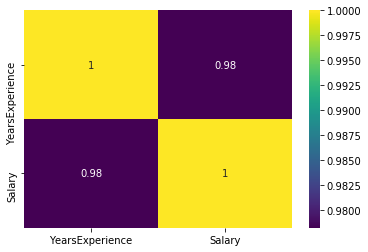

In [38]:
# check correlation
sns.heatmap(salary_DF.corr(), annot=True, cmap='viridis')

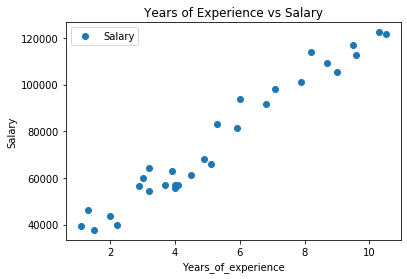

In [39]:
# Graph
salary_DF.plot(x='YearsExperience', y='Salary', style='o')
plt.title('Years of Experience vs Salary')
plt.xlabel('Years_of_experience')
plt.ylabel('Salary')
plt.show()

In [45]:
# Split the data
X = salary_DF['YearsExperience'].values.reshape(-1,1)
Y = salary_DF['Salary'].values.reshape(-1,1)

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)

In [48]:
regressor = LinearRegression()
regressor.fit(X_train, y_train) #training

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# Intercept
regressor.intercept_

array([26777.3913412])

In [50]:
# Slope
regressor.coef_

array([[9360.26128619]])

In [51]:
y_pred = regressor.predict(X_test)
y_pred

array([[ 40817.78327049],
       [123188.08258899],
       [ 65154.46261459],
       [ 63282.41035735],
       [115699.87356004],
       [108211.66453108],
       [116635.89968866],
       [ 64218.43648597],
       [ 76386.77615802]])

In [53]:
final_DF = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : y_pred.flatten()})
final_DF

,Actual,Predicted
0,37731.0,40817.783270
1,122391.0,123188.082589
2,57081.0,65154.462615
3,63218.0,63282.410357
4,116969.0,115699.873560
5,109431.0,108211.664531
6,112635.0,116635.899689
7,55794.0,64218.436486
8,83088.0,76386.776158


In [54]:
final_DF.shape

(9, 2)

In [65]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Absolute Error: 3737.4178618788987
Mean Squared Error: 23370078.800832972
Root Mean Squared Error: 4834.260936361728
R-squared Error: 0.9740993407213511
R2 Score: 0.9740993407213511


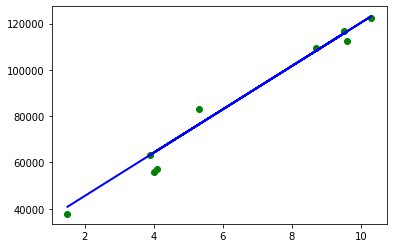

In [59]:
# Graph
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='blue', linewidth=2)
plt.show()